# Computational Social Science Project #3 

*Name:* Alex Schulte

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [130]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score


In [131]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [132]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [133]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [134]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [135]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

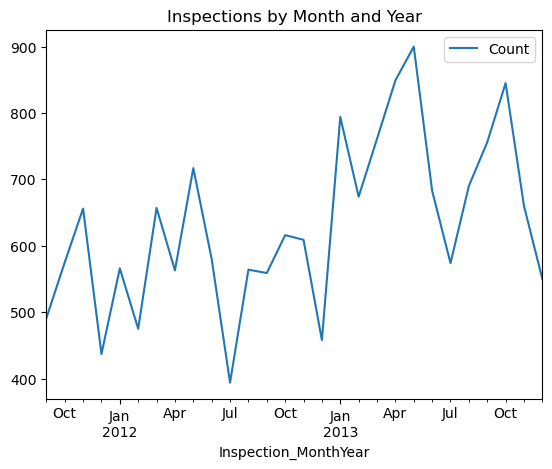

In [136]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

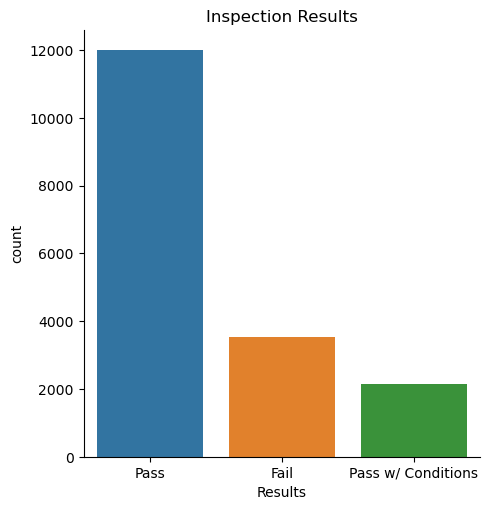

In [137]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

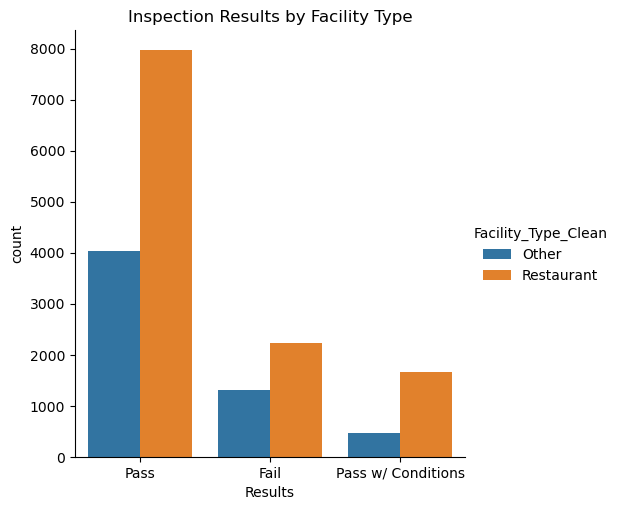

In [138]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [139]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [140]:
#find unique values of 'Results'

unique_results = chicago_inspections_2011_to_2013['Results'].unique()

print(unique_results)


['Pass' 'Fail' 'Pass w/ Conditions']


In [141]:
chicago_inspections_2011_to_2013.head()

,,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,Grocery Store,Risk 3 (Low),Canvass,Pass,Other,0,0,2,0,0,0,0,2.0,1,44-33,19.0,Retail Food Establishment,RENEW,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
507211,PANERA BREAD,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,3,0,0,0,0,2.0,1,50-23,24.0,Retail Food Establishment,RENEW,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
507212,LITTLE QUIAPO RESTAURANT,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,50-25,17.0,Retail Food Establishment,RENEW,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
507216,SERGIO'S TAQUERIA PIZZA INC.,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,0,0,0,0,2.0,1,39-48,17.0,Retail Food Establishment,RENEW,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
507219,TARGET STORE # T-2079,Restaurant,Risk 2 (Medium),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,40-18,24.0,Retail Food Establishment,RENEW,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0


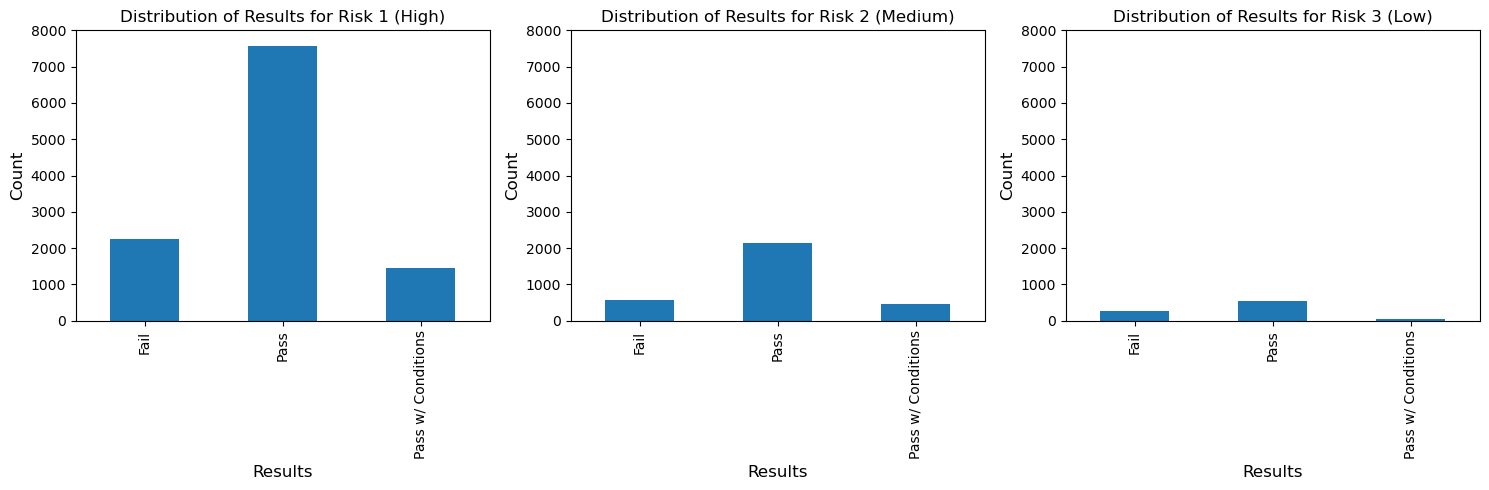

In [142]:
# I'm adding this, exploring number of Pass, Fail, etc by each Risk category

risk_groups = chicago_inspections_2011_to_2013.groupby('Risk')['Results'].value_counts().unstack().fillna(0)

# subplots for each Risk category
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# same y axis for scale
y_limit = (0, 8000)

# bar charts for each Risk category
for i, risk_category in enumerate(risk_groups.index):
    ax = axes[i]
    risk_data = risk_groups.loc[risk_category]
    risk_data.plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of Results for {risk_category}', fontsize=12)
    ax.set_xlabel('Results', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_ylim(y_limit)

plt.tight_layout()
plt.show()


*Interpretation:* A lot more cases were flagged as high risk. A lot of them passed though.

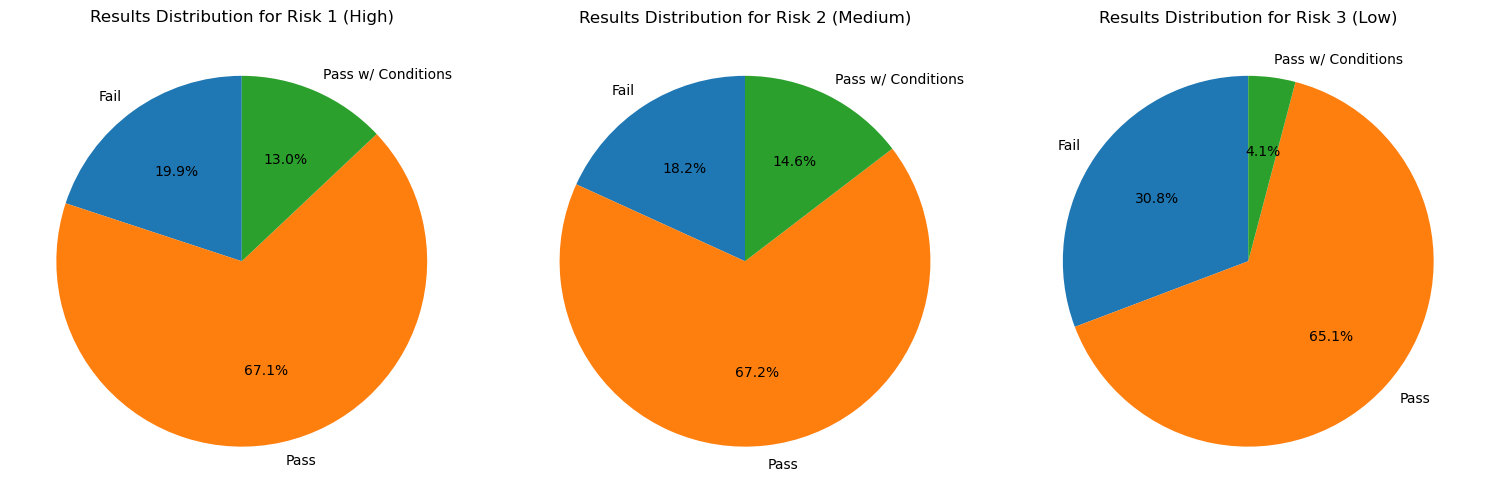

In [143]:
# exploring proportions

risk_groups = chicago_inspections_2011_to_2013.groupby('Risk')['Results'].value_counts().unstack().fillna(0)

# subplots for each Risk category
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# pie charts for each Risk category
for i, risk_category in enumerate(risk_groups.index):
    ax = axes[i]
    risk_data = risk_groups.loc[risk_category]
    labels = risk_data.index
    sizes = risk_data.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Results Distribution for {risk_category}', fontsize=12)

plt.tight_layout()
plt.show()

**Interpretation:** # This is interesting... unless my code above is wrong, it seems like there's a higher portion of Fail in the Low Risk group? In other words, whoever is creating the Risk variables isn't very good at predicting the ultimate Result.


In [144]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# binarize the outcome variable 
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [145]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [146]:
unique_values = np.unique(y)

print(unique_values)

[0 1]


In [147]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,1,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,1,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,1,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,1,0,1,0,0,0,1


In [148]:
print('data types:', X.dtypes)

data types: criticalCount                                    int64
seriousCount                                     int64
minorCount                                       int64
pastFail                                         int64
pastCritical                                     int64
pastSerious                                      int64
pastMinor                                        int64
timeSinceLast                                  float64
firstRecord                                      int64
POLICE_DISTRICT                                float64
ageAtInspection                                float64
consumption_on_premises_incidental_activity      int64
tobacco                                          int64
package_goods                                    int64
outdoor_patio                                    int64
public_place_of_amusement                        int64
limited_business_license                         int64
childrens_services_facility_license              int6

**Interpretation:** Good, no funky values or object types in y or X

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1: Random Forest

#### Background

*Logic:* Random Forest is a "bagging" method, it's an extension of the decision tree method. Rather than construct just one tree, a random forest grows many trees, using a subset of features to grow each tree. The trees then make predictions, and the random forest takes a majority vote from the trees to determine the winner. 

*Assumptions:* This model generally assumes that individual decision trees have high variance but low bias. It aggregates the predictions of multiple trees and aims to reduce overfitting and improve generalization.

*Pros:*
 - Provides feature importances which can help with interpretability
 - Due to the averaging techniques, it is generally robust to overfitting
 - Can do both classification and regression well
 
 *Cons:*
- May require more computational resources and be less interpretable than other simpler models

*Plausible Choice:* 
Random Forests could be a plausible choice due to their ability to handle complex datasets, reduce overfitting, and provide insights into feature importance. They are robust and perform well in a variety of settings, making them suitable for your task of predicting food inspection results. These models are generally good, but the more complex models below may have better scores.


#### Code

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [150]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [151]:
# specify cross-validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

In [152]:
# calculate the average score across models
# ----------
scores.mean()

0.921429109109314

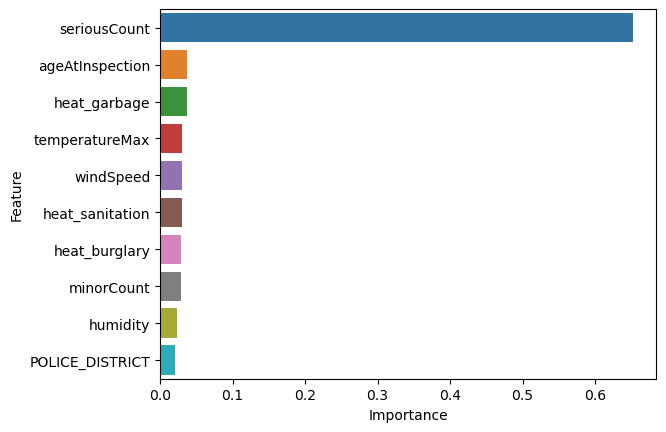

In [153]:
# fit the random forest on data to get feature importance
# ----------
rf_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

**Interpretation:** It seems like a few features, especially 'seriousCount' have an outsized effect on the Result. Like we did in lab, I am going to re-fit the model with just the important features and see how the accuracy score changes

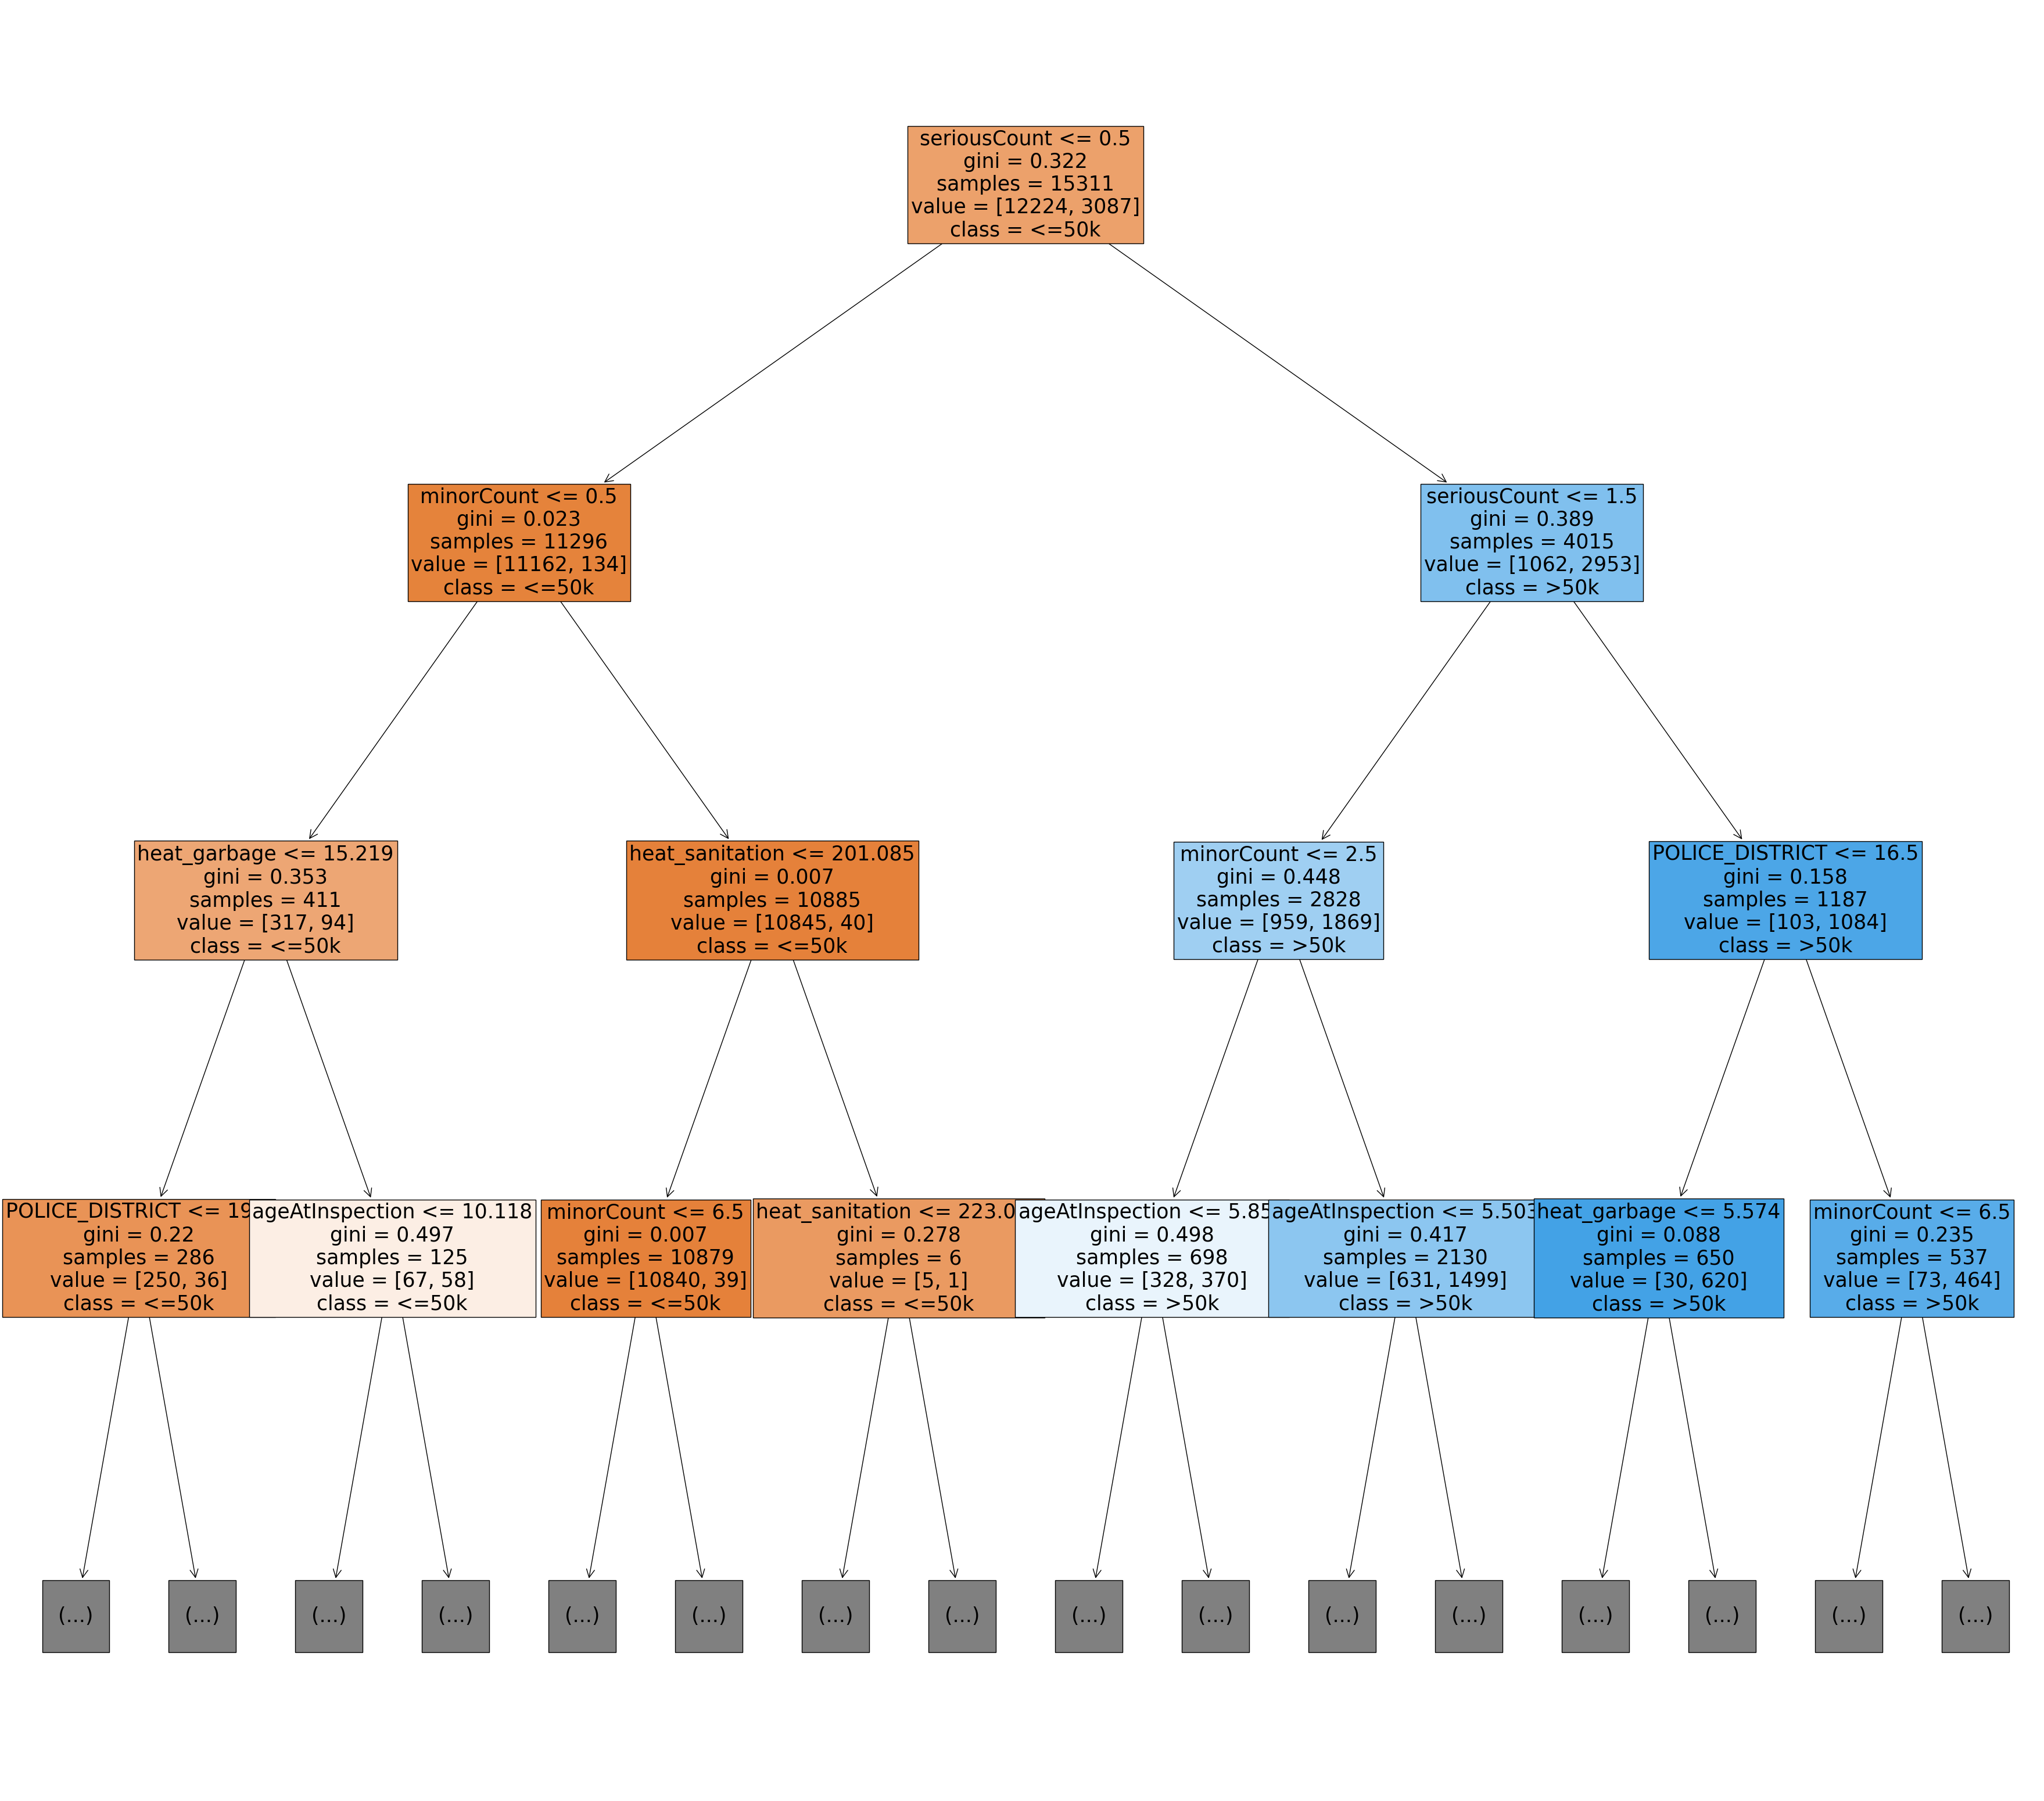

In [154]:
# refit a basic decision tree using reduced number of features 
# ----------
dt_reduced_classifier = tree.DecisionTreeClassifier(
                                 # specify parameters
                                 criterion='gini',              # or 'entropy' for information gain
                                 splitter='best',               # or 'random' for random best split
                                 max_depth=5,                   # how deep tree nodes can go
                                 min_samples_split=2,           # samples needed to split node
                                 min_samples_leaf=1,            # samples needed for a leaf
                                 min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                 max_features=None,             # number of features to look for when splitting
                                 max_leaf_nodes=None,           # max nodes
                                 min_impurity_decrease=1e-07,   # early stopping
                                 random_state = 10)             # random seed

# pull out the most features
important_features = feat_importances.nlargest(10, 'Importance')['Feature']

# create new dataset with only most important features
X_reduced = X[X.columns[X.columns.isin(important_features)]]

# fit the model on the new reduced model
dt_reduced_classifier.fit(X_reduced,
                          y)

# set column names as list
reduced_column_names = X_reduced.columns.tolist()

# plot 
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(decision_tree = dt_reduced_classifier,                          
                   feature_names=reduced_column_names,  # make sure its a list
                   class_names=["<=50k", ">50k"],       # specify class names
                   filled=True,                         # paint nodes to indicate majority class 
                   fontsize = 25,                       # set fontsize
                   max_depth = 3)                       # set max depth of tree to view                      

In [155]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(dt_reduced_classifier, 
                         X, 
                         y.ravel(),
                         cv=5)

# find the mean score across models
scores.mean()

0.9204492080419614

**Result:** Slightly lower, but not by much. If/when we're working with bigger datasets, it probably makes sense to use only the most important features for computational efficiency

*I didn't realize the hyperparameter tuning part, so doing that in the code below.*

In [ ]:
# commenting out, takes a long time to run (>15 min). use code chunk below with fewer values

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Set up a hyperparameter grid
# param_grid = {
   # 'n_estimators': [100, 200, 300],       
   # 'criterion': ['gini', 'entropy'],      
   # 'max_depth': [None, 10, 20, 30],        
   # 'min_samples_split': [2, 5, 10],       
   # 'min_samples_leaf': [1, 2, 4],       
   # 'max_features': ['auto', 'sqrt', 'log2'] 
# }

# Step 2: Initialize Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=10)

# Step 3: Perform grid search with cross-validation
# rf_grid = GridSearchCV(rf_classifier, param_grid, cv=3)
# rf_grid.fit(X, y)

# Print the best hyperparameters
# print("Best Hyperparameters:")
# print(rf_grid.best_params_)

# Fit the model using the best hyperparameters
# best_rf_model = rf_grid.best_estimator_
# best_rf_model.fit(X, y)


In [156]:
# this one works

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: reduced hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],             # Fewer values for n_estimators
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],               # Fewer values for max_depth
    'min_samples_split': [2, 5],           # Fewer values for min_samples_split
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Step 2: Initialize classifier
rf_classifier = RandomForestClassifier(random_state=10)

# Step 3: Perform grid search with cv
rf_grid = GridSearchCV(rf_classifier, param_grid, cv=3)
rf_grid.fit(X,y)

print("Best Hyperparameters:")
print(rf_grid.best_params_)

# Fit the model 
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(X,y)


Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       n_estimators=200, random_state=10)

###  Model 2: Adaptive Boosting

#### Background

*Logic:* Another approach for ensembling decision trees is called "boosting". Whereas random forests grow many decision trees in parallel and take a vote from them. Boosting algorithms start with a strong classifier and iterate on it with weak learners. The weak learners are trained on the errors, which makes boosting algorithms well suited for making classifications in difficult cases.

*Assumptions:* AdaBoost assumes that weak learners can be combined to form a strong, accurate model. 

*Pros:*
- AdaBoost has improved prediction to random forests typically
- It is particularly effective when weak learners have performance better than random chance
- Handles imbalanced datasets well
- Reduces bias and variance, improving generalization

*Cons:* 
- AdaBoost is more prone to overfitting precisely because of how it gets better results (focuses on error)
- Sensitive to noisy data and outliers

*Plausible Choice:* AdaBoost is a good choice to handle complex relationships in the data with improved accuracy, which may be the case for identifying patterns in food inspection data

#### Code

In [157]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

In [158]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [159]:
# calculate mean score across models 
# ----------
scores.mean()

0.9146365471623236

**Interpretation:** Interesting that AdaBoost got a slightly lower score than RandomForest because we found the opposite - AdaBoost did better than RandomForest - in lab. Maybe it is overfitting because of the way it focuses on the error to fit the models.

*same, I didn't realize the hyperparameter tuning part, so doing that in the code below.*

In [160]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Set up a reduced hyperparameter grid 
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 1.0],  
    'algorithm': ['SAMME', 'SAMME.R'],  
    'random_state': [10]  
}

# Step 2: Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=None)

# Step 3: Perform grid search with cv
adaboost_grid = GridSearchCV(adaboost_classifier, param_grid, cv=3)
adaboost_grid.fit(X,y)

print("Best Hyperparameters:")
print(adaboost_grid.best_params_)

# Fit the model 
best_adaboost_model = adaboost_grid.best_estimator_
best_adaboost_model.fit(X,y)


Best Hyperparameters:
{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 10}


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   random_state=10)

### Model 3: XGBoost

#### Background

*Logic:* XGBoost also uses sequential weak learners to train the models instead of creating a random forest. One key difference from AdaBoost() is that it uses Gradient Descent to minimize a loss function and improve fit whereas AdaBoost() assigns larger weights to incorrectly classified observations so that future models focus on classifying those observations in future models.

*Assumptions:* XGBoost assumes that a combination of not very deep decision trees can approximate complex functions well

*Pros:*
- Aiims to minimize both bias and variance and because of that handles missing data and outliers well
- Can do classification, regression, and ranking tasks
- Can provide feature importance scores which helps with interpretability

*Cons:*
- more computationally intensitve and requires more careful hyperparameter tuning

*Plausible Choice:* Can handle complex relationships and noisy data which would make it a strong candidate for predicting food inspection outcomes probably

#### Code

In [161]:
#have to do this because I previously got the error: 
# ModuleNotFoundError: No module named 'xgboost'

pip install xgboost


SyntaxError: invalid syntax (3091873039.py, line 4)

In [218]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Step 1: Set up a reduced hyperparameter grid 
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [3, 4, 5],  
    'learning_rate': [0.01, 0.1], 
    'subsample': [0.8, 0.9], 
    'colsample_bytree': [0.8, 0.9],  
    'random_state': [10]  
}

# Step 2: Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Step 3: Perform grid search with cv
xgb_grid = GridSearchCV(xgb_classifier, param_grid, cv=3)
xgb_grid.fit(X,y)

print("Best Hyperparameters:")
print(xgb_grid.best_params_)

# Fit the model 
best_xgb_model = xgb_grid.best_estimator_
best_xgb_model.fit(X,y)


ValueError: 
All the 144 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/xgboost/sklearn.py", line 1467, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Fail' 'Pass' 'Pass w/ Conditions']


### Validation Metrics

#### Model 1: Random Forest

In [163]:
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(best_rf_model,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")



accuracy: 0.926
recall: 0.907
precision: 0.769
f1: 0.832


#### Model 2: AdaBoost

In [164]:
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(best_adaboost_model,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")



accuracy: 0.922
recall: 0.957
precision: 0.736
f1: 0.832


#### Model 3: XGBoost

In [165]:
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(best_xgb_model,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")



accuracy: 0.926
recall: 0.921
precision: 0.762
f1: 0.833


**Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.**

In this context, we have to consider both minimizing false negatives (missed violations) and false positives (unnecessary audits). Probably F1 would be best.

XGBoost has a slightly higher F1 score, so I am going to go with that model.

In food safety, there is likely imbalanced datasets (meaning the number of businesses that fail inspections is much smaller than those that pass). In such cases, a high accuracy can be misleading because the model might classify most establishments as "pass" (the majority class) and still achieve a high accuracy while failing to detect important "fail" cases. This is similar to the example we explored in lab.

Recall measures the ability of the model to correctly identify all positive instances (businesses that failed inspections) out of all actual positive instances. A high recall ensures that I would be effectively capturing most of the establishments that have genuine issues with food safety. 

Precision measures the ability of the model to correctly identify positive instances (businesses that fail inspections) out of all instances it predicted as positive. Precision is important because I want to minimize false positives.

The F1 Score is a good balance between precision and recall. It is useful because I want to consider both false positives and false negatives.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

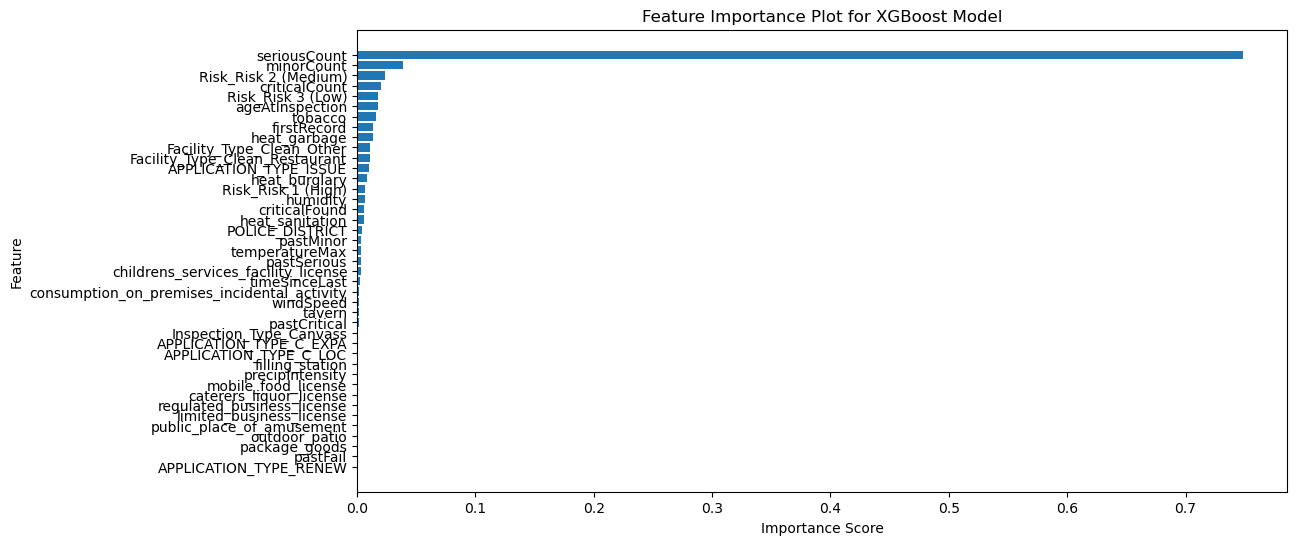

In [166]:
import xgboost as xgb
import matplotlib.pyplot as plt

best_xgb_model.fit(X,y)

# feature importances from trained model
feature_importance = best_xgb_model.feature_importances_

# feature names
feature_names = X.columns  

# store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance score 
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Plot for XGBoost Model')
plt.gca().invert_yaxis()  # display the most important features at the top
plt.show()


**Interpretation:** Similar to the RF feature importance chart above, it seems like a few features (e.g., 'seriousCount') have an outsized effect on the Result. 

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [181]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# Use the trained XGBoost model to predict outcomes (0: Pass, 1: Fail) and probabilities
y_pred = best_xgb_model.predict(X)
y_pred_proba = best_xgb_model.predict_proba(X)[:, 1]  # Probability of "Fail"


In [168]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# store predictions and probabilities
audit_results = pd.DataFrame({'Prediction': y_pred, 'Probability': y_pred_proba})

# Sort audits in descending order
audit_results = audit_results.sort_values(by='Probability', ascending=False)


In [169]:
audit_results

,Prediction,Probability
3186,1,0.862366
13367,1,0.861761
2786,1,0.861223
7253,1,0.861167
698,1,0.858892
...,...,...
4807,0,0.037742
11212,0,0.037742
14782,0,0.037742
4802,0,0.037742


In [170]:
first_1000_observations = audit_results.head(1000)
first_1000_observations

,Prediction,Probability
3186,1,0.862366
13367,1,0.861761
2786,1,0.861223
7253,1,0.861167
698,1,0.858892
...,...,...
11704,1,0.753956
13161,1,0.753956
2830,1,0.753956
15106,1,0.753758


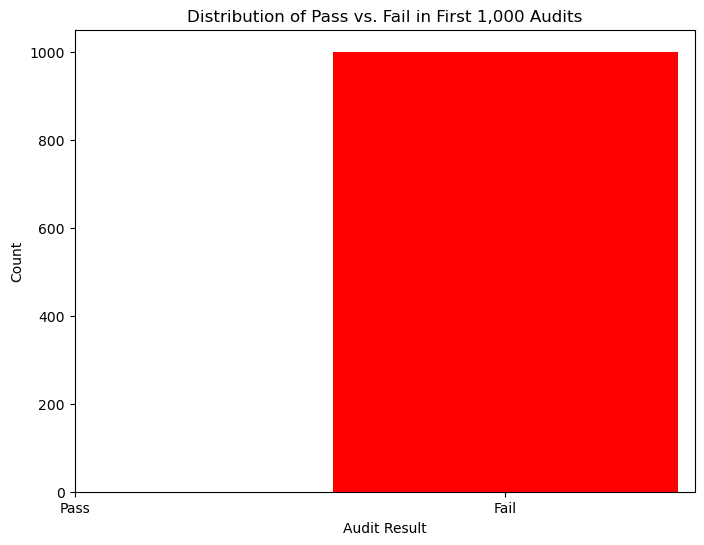

In [171]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'Prediction' and count occurrences
audit_counts = first_1000_observations['Prediction'].value_counts()

# Plot the distribution of pass vs. fail as a stacked bar plot
plt.figure(figsize=(8, 6))
plt.bar(audit_counts.index, audit_counts.values, color=['red', 'red'])
plt.xticks([0, 1], ['Pass', 'Fail'])  # Set explicit x-axis ticks and labels
plt.xlabel('Audit Result')
plt.ylabel('Count')
plt.title('Distribution of Pass vs. Fail in First 1,000 Audits')
plt.show()




**Interpretation:** All Fails, I'm assuming because we only did the first 1000 observations, so I'm going to do the same thing but with the full dataset.

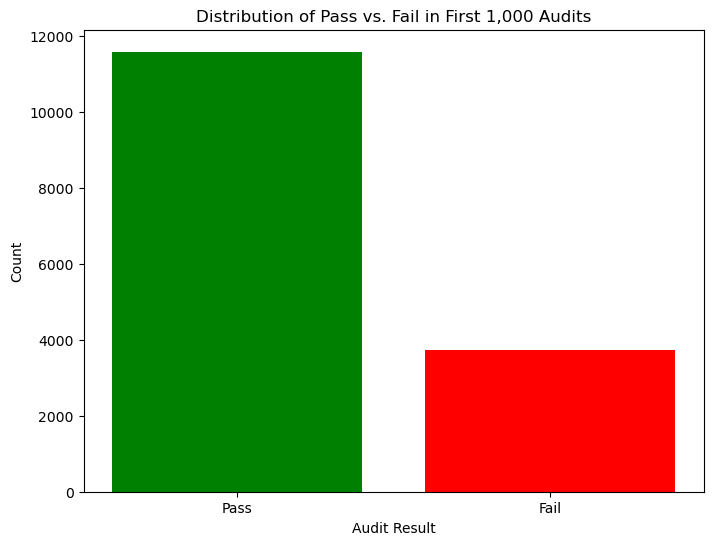

In [172]:
# 3. Plot your distribution of pass/fail among the *full dataset*
# -----------

# Group the data and count occurrences
audit_counts = audit_results['Prediction'].value_counts()

# Plot 
plt.figure(figsize=(8, 6))
plt.bar(audit_counts.index, audit_counts.values, color=['green', 'red'])
plt.xticks([0, 1], ['Pass', 'Fail'])  # Set explicit x-axis ticks and labels
plt.xlabel('Audit Result')
plt.ylabel('Count')
plt.title('Distribution of Pass vs. Fail in First 1,000 Audits')
plt.show()


**Interpretation:** Makes sense, more plausible distribution of Pass vs. Fail

In [183]:
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

# Load the full dataset (chicago_2011_to_2013.csv)
full_dataset = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

# Assuming 'y' contains the actual target variable (Results)
y_actual = full_dataset['Results']

# Predict outcomes and probabilities using the XGBoost model
y_predicted = best_xgb_model.predict(X)  # Replace with your predictor matrix (X)

# Simulate random audits by selecting 1,000 observations at random
random_sample = full_dataset.sample(n=1000, random_state=42)



In [200]:
chicago_inspections_2011_to_2013.head()

,,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,Grocery Store,Risk 3 (Low),Canvass,Pass,Other,0,0,2,0,0,0,0,2.0,1,44-33,19.0,Retail Food Establishment,RENEW,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
507211,PANERA BREAD,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,3,0,0,0,0,2.0,1,50-23,24.0,Retail Food Establishment,RENEW,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
507212,LITTLE QUIAPO RESTAURANT,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,50-25,17.0,Retail Food Establishment,RENEW,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
507216,SERGIO'S TAQUERIA PIZZA INC.,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,0,0,0,0,2.0,1,39-48,17.0,Retail Food Establishment,RENEW,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
507219,TARGET STORE # T-2079,Restaurant,Risk 2 (Medium),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,40-18,24.0,Retail Food Establishment,RENEW,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0


In [204]:
print('data types:', chicago_inspections_2011_to_2013.dtypes)

data types: Facility_Type                                   object
Risk                                            object
Inspection_Type                                 object
Results                                         object
Facility_Type_Clean                             object
criticalCount                                    int64
seriousCount                                     int64
minorCount                                       int64
pastFail                                         int64
pastCritical                                     int64
pastSerious                                      int64
pastMinor                                        int64
timeSinceLast                                  float64
firstRecord                                      int64
WARD_PRECINCT                                   object
POLICE_DISTRICT                                float64
LICENSE_DESCRIPTION                             object
APPLICATION_TYPE                                objec

In [206]:
riskiest_establishments.head()

,,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Predicted_Risk_Score
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920219,FARMERS FOOD BASKET,Grocery Store,Risk 2 (Medium),Canvass,Fail,Other,2,2,8,0,0,0,0,2.0,1,6-7,3.0,Retail Food Establishment,RENEW,3.276712,0,1,0,0,0,1,0,0,0,0,0,0,0.000090,64.246667,15.186667,0.606667,54.267958,33.121274,78.212768,1,0.862366
1343301,MILKY WAY FOOD.INC.,Grocery Store,Risk 2 (Medium),Canvass,Fail,Other,3,4,8,0,0,0,0,2.0,1,24-36,10.0,Retail Food Establishment,ISSUE,1.706849,0,1,0,0,0,1,0,0,0,0,0,0,0.007797,74.433333,10.620000,0.800000,63.839575,65.494378,62.565805,1,0.861761
673228,SUNSHINE FOOD MART.,Grocery Store,Risk 2 (Medium),Canvass,Fail,Other,2,2,6,0,0,0,0,2.0,1,17-39,7.0,Retail Food Establishment,RENEW,6.846575,0,1,0,0,0,0,0,0,0,0,0,0,0.000427,37.670000,12.050000,0.676667,48.081306,31.990775,42.825683,1,0.861223
1174318,LA GARITA DE SAN LUIS,Wholesale,Risk 3 (Low),Canvass,Fail,Other,4,2,7,0,0,0,0,2.0,1,24-5,11.0,Wholesale Food Establishment,RENEW,8.312329,0,0,0,0,0,0,0,0,0,0,0,0,0.003003,85.576667,8.346667,0.626667,43.072814,20.326355,60.666662,1,0.861167
547860,SKY FOOD AND DOLLAR,Grocery Store,Risk 3 (Low),Canvass,Fail,Other,3,2,8,0,0,0,0,2.0,1,24-23,10.0,Retail Food Establishment,RENEW,4.986301,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,44.043333,14.936667,0.603333,34.826396,26.448967,30.174764,1,0.858892


In [201]:
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.

# having trouble with this code, so trying a few differnet things below...

# -----------
# Use the trained XGBoost model to predict outcomes (0: Pass, 1: Fail) and probabilities
y_pred = best_xgb_model.predict(X)
y_pred_proba = best_xgb_model.predict_proba(X)[:, 1]  # Probability of "Fail"


# Use the best XGBoost model to make predictions
y_pred = best_xgb_model.predict(X)

# Get predicted risk scores (probability of failing the inspection)
predicted_risk_scores = best_xgb_model.predict_proba(X)[:, 1]

# Sort establishments by predicted risk scores and select the top 1,000
riskiest_establishments = chicago_inspections_2011_to_2013.copy()  
riskiest_establishments['Predicted_Risk_Score'] = predicted_risk_scores
riskiest_establishments = riskiest_establishments.sort_values(by='Predicted_Risk_Score', ascending=False).head(1000)



In [211]:
# making true labels for the selected establishments
y_true_labels_selected = riskiest_establishments['Results']  # Replace with your actual target variable


# process target 
# -----------

# binarize the outcome variable 
y_true_labels_selected = y_true_labels_selected.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_true_labels_selected = lb_style.fit_transform(y_true_labels_selected)

# recode 0s and 1s so 1s are "Fail"
y_true_labels_selected = np.where(y_true_labels_selected == 1, 0 ,1)
y_true_labels_selected

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [212]:

# process features
# -----------

# create feature dataset
X_predicted_labels_selected = riskiest_establishments.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X_predicted_labels_selected = pd.get_dummies(X_predicted_labels_selected)

X_predicted_labels_selected.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Predicted_Risk_Score,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920219,FARMERS FOOD BASKET,2,2,8,0,0,0,0,2.0,1,3.0,3.276712,0,1,0,0,0,1,0,0,0,0,0,0,0.000090,64.246667,15.186667,0.606667,54.267958,33.121274,78.212768,1,0.862366,0,1,0,1,1,0,0,0,0,1
1343301,MILKY WAY FOOD.INC.,3,4,8,0,0,0,0,2.0,1,10.0,1.706849,0,1,0,0,0,1,0,0,0,0,0,0,0.007797,74.433333,10.620000,0.800000,63.839575,65.494378,62.565805,1,0.861761,0,1,0,1,1,0,0,0,1,0
673228,SUNSHINE FOOD MART.,2,2,6,0,0,0,0,2.0,1,7.0,6.846575,0,1,0,0,0,0,0,0,0,0,0,0,0.000427,37.670000,12.050000,0.676667,48.081306,31.990775,42.825683,1,0.861223,0,1,0,1,1,0,0,0,0,1
1174318,LA GARITA DE SAN LUIS,4,2,7,0,0,0,0,2.0,1,11.0,8.312329,0,0,0,0,0,0,0,0,0,0,0,0,0.003003,85.576667,8.346667,0.626667,43.072814,20.326355,60.666662,1,0.861167,0,0,1,1,1,0,0,0,0,1
547860,SKY FOOD AND DOLLAR,3,2,8,0,0,0,0,2.0,1,10.0,4.986301,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,44.043333,14.936667,0.603333,34.826396,26.448967,30.174764,1,0.858892,0,0,1,1,1,0,0,0,0,1


In [213]:
import pandas as pd

# Assuming 'df' is your DataFrame
column_names = X_predicted_labels_selected.columns.tolist()

# 'column_names' now contains a list of column names from the DataFrame 'df'
print(column_names)

['criticalCount', 'seriousCount', 'minorCount', 'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast', 'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection', 'consumption_on_premises_incidental_activity', 'tobacco', 'package_goods', 'outdoor_patio', 'public_place_of_amusement', 'limited_business_license', 'childrens_services_facility_license', 'tavern', 'regulated_business_license', 'filling_station', 'caterers_liquor_license', 'mobile_food_license', 'precipIntensity', 'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary', 'heat_garbage', 'heat_sanitation', 'criticalFound', 'Predicted_Risk_Score', 'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)', 'Inspection_Type_Canvass', 'Facility_Type_Clean_Other', 'Facility_Type_Clean_Restaurant', 'APPLICATION_TYPE_C_EXPA', 'APPLICATION_TYPE_C_LOC', 'APPLICATION_TYPE_ISSUE', 'APPLICATION_TYPE_RENEW']


In [216]:
# Predicted labels for the selected establishments

#having trouble with this piece of code... can't figure it out
# tried full list of features and then just the features with the highest importance score

predicted_labels_selected = best_xgb_model.predict(X_predicted_labels_selected['seriousCount', 
                                                                               'minorCount',
                                                                              'Risk_Risk 2 (Medium)',
                                                                              'criticalCount'])  # Replace with your feature columns


KeyError: ('seriousCount', 'minorCount', 'Risk_Risk 2 (Medium)', 'criticalCount')

In [210]:
# Calculate recall and F1 metrics for the selected establishments
# commending this out bc it won't work without the code above

from sklearn.metrics import recall_score, f1_score


#recall_selected = recall_score(true_labels_selected, predicted_labels_selected)
#f1_selected = f1_score(true_labels_selected, predicted_labels_selected)

#print("Recall:", recall_selected)
#print("F1 Score:", f1_selected)


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

#### Preprocessing data

In [185]:
# look at the inspections data
chicago_inspections_2014.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Results
0,920444,2014-01-15,GALLISTEL LANGUAGE ACADEMY,GALLISTEL LANGUAGE ACADEMY,2046708,School,Risk 1 (High),10200 S AVENUE J,CHICAGO,IL,60617.0,Canvass,41.709957,-87.534223,"(41.70995714781606, -87.5342225149751)",Other,0,1,5,0,0,0,2,0.964384,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,41.67,13.533333,0.726667,2.149376,7.705332,9.535848,0,Fail
1,920445,2014-02-03,SUBWAY,SUBWAY,2183563,Restaurant,Risk 1 (High),4025 E 106TH ST,CHICAGO,IL,60617.0,Canvass,41.702577,-87.525872,"(41.70257660937248, -87.52587169711877)",Restaurant,2,0,0,0,0,0,0,0.794521,0,2183563-20120829,2183563.0,375027.0,AMI SUB INC.,SUBWAY,4025 E 106TH ST 1,CHICAGO,IL,60617.0,10.0,38.0,10-38,4.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2183563.0,ISSUE,2012-08-29,2014-09-15,AAI,41.702577,-87.525872,2012-08-29,2018-09-15,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,Pass w/ Conditions
2,920446,2014-02-03,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,1477112,Restaurant,Risk 2 (Medium),2027 E 95TH ST,CHICAGO,IL,60617.0,Canvass,41.722372,-87.574275,"(41.72237211196818, -87.57427469548966)",Restaurant,0,0,6,0,0,0,2,0.660274,0,1477112-20120716,2155150.0,273266.0,"A & K SHARKS, INC.",SHARKS FISH & CHICKEN,2027 E 95TH ST,CHICAGO,IL,60617.0,7.0,49.0,7-49,4.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1477112.0,RENEW,2012-07-16,2014-07-15,AAI,41.722372,-87.574275,2004-03-02,2018-07-15,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,Pass
3,920448,2014-03-07,P K PETRO INC.,MARATHON,1331469,Grocery Store,Risk 3 (Low),7001 S STONY ISLAND AVE,CHICAGO,IL,60649.0,Canvass,41.767798,-87.585820,"(41.76779762303839, -87.58581991823232)",Other,0,1,7,0,0,0,0,2.000000,1,1331469-20121216,2194284.0,257899.0,P K PETRO INC.,Stony Shell,7001 S STONY ISLAND AVE,CHICAGO,IL,60649.0,5.0,21.0,5-21,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1331469.0,RENEW,2012-12-16,2014-12-15,AAI,41.767798,-87.585820,2003-03-05,2018-12-15,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,Fail
4,920449,2014-03-07,"Z T DOLLAR EXCHANGE,INC",DOLLAR STORE,2189299,Grocery Store,Risk 3 (Low),2429 E 72ND ST,CHICAGO,IL,60649.0,Canvass,41.764339,-87.565371,"(41.764339216775696, -87.5653706801239)",Other,1,2,5,0,0,0,0,2.000000,1,2189299-20121009,2189299.0,249904.0,"ZT DOLLAR EXCHANGE, INC.","Z T DOLLAR EXCHANGE, INC.",2429 E 72ND ST,CHICAGO,IL,60649.0,7.0,40.0,7-40,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2189299.0,ISSUE,2012-10-09,2014-12-15,AAI,41.764339,-87.565371,2012-10-09,2018-12-15,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,Fail


In [224]:
chicago_inspections_2014.shape

(4623, 73)

In [223]:
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [225]:
# same as above: drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE'],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [226]:
# convert the inspection date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])  

In [227]:
# data processing
# -----------

# process features
X_test2014 = chicago_inspections_2014.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])

X_test2014 = pd.get_dummies(X)



In [229]:
X_test2014.shape

(15311, 41)

In [231]:
X_test2014.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,1,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,1,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,1,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,1,0,1,0,0,0,1


In [232]:
y

Inspection_ID  DBA_Name                                
269961         SEVEN STAR                                                Pass
507211         PANERA BREAD                                              Pass
507212         LITTLE QUIAPO RESTAURANT                                  Fail
507216         SERGIO'S TAQUERIA PIZZA INC.                              Pass
507219         TARGET STORE # T-2079                                     Fail
                                                                  ...        
1393258        CIAO BELLA CAFE                                           Pass
1395218        Christian Fields Style  Bar                               Pass
1395224        W CHICAGO - LAKESHORE                       Pass w/ Conditions
1441493        ADVOCATE ILLINOIS MASONIC MEDICAL CENTER                  Pass
1493801        SODEXHO                                                   Pass
Name: Results, Length: 15311, dtype: object

In [233]:
y_test2014 = chicago_inspections_2014['Results']
y_test2014

Inspection_ID  DBA_Name                            
920444         GALLISTEL LANGUAGE ACADEMY                            Fail
920445         SUBWAY                                  Pass w/ Conditions
920446         SHARKS FISH & CHICKEN                                 Pass
920448         P K PETRO INC.                                        Fail
920449         Z T DOLLAR EXCHANGE,INC                               Fail
                                                              ...        
1506245        TORTILLA SOUP                                         Pass
1506247        GROTA RESTAURANT                                      Pass
1508206        CHICAGO INTERNATIONAL CHARTER SCHOOL                  Pass
1508207        R U HUNGRY?                                           Pass
1513208        EL RANCHITO FOOD                                      Pass
Name: Results, Length: 4623, dtype: object

In [234]:
# process target 

y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)

In [235]:
y_test2014

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [236]:
unique_values = np.unique(y_test2014)

print(unique_values)

[0 1]


In [237]:
import numpy as np

# Assuming 'my_array' is your NumPy array
shape = y_test2014.shape

# 'shape' now contains the shape of the array, e.g., (rows, columns) for a 2D array
print(shape)


(4623, 1)


In [238]:
X_test2014.shape

(15311, 41)

In [239]:
X.shape

(15311, 41)

In [240]:
print('data types:', X_test2014.dtypes)

data types: criticalCount                                    int64
seriousCount                                     int64
minorCount                                       int64
pastFail                                         int64
pastCritical                                     int64
pastSerious                                      int64
pastMinor                                        int64
timeSinceLast                                  float64
firstRecord                                      int64
POLICE_DISTRICT                                float64
ageAtInspection                                float64
consumption_on_premises_incidental_activity      int64
tobacco                                          int64
package_goods                                    int64
outdoor_patio                                    int64
public_place_of_amusement                        int64
limited_business_license                         int64
childrens_services_facility_license              int6

**Interpretation:** Looks good. X and y values seem to be clean and did the same type of pre-processing as 2011-2013 data above

In [246]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Step 1: Set up a reduced hyperparameter grid 
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [3, 4, 5],  
    'learning_rate': [0.01, 0.1], 
    'subsample': [0.8, 0.9], 
    'colsample_bytree': [0.8, 0.9],  
    'random_state': [10]  
}

# Step 2: Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Step 3: Perform grid search with cv
xgb_grid = GridSearchCV(xgb_classifier, param_grid, cv=3)
xgb_grid.fit(X_test2014,y_test2014)




GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200], 'random_state': [10],
                         'subsample': [0.8, 0.9]})

when i run the code chunk above, I keep getting the error below. Not sure why, X_test2014 and y_test 2014 have the same shape as X and y above (using the 2011-13 data) and that worked fine

ValueError: Found input variables with inconsistent numbers of samples: [15311, 4623]

I know it's not correct, but I'm going to randomly shuffle the X_test2014 dataframe and then drop rows so y_test2014 and X_test2014 have the same number of rows 4623 and run the code again to see if it will work

In [242]:
import pandas as pd

X_test2014 = X_test2014.sample(frac=1, random_state=42)


In [243]:
desired_row_count = 4623

current_row_count = X_test2014.shape[0]

rows_to_drop = current_row_count - desired_row_count

# Drop the excess rows to reach the desired row count
if rows_to_drop > 0:
    X_test2014 = X_test2014.sample(n=desired_row_count, random_state=42)

# 'now contains the desired number of rows (4623)

X_test2014.shape

(4623, 41)

In [247]:
# Fit the model  

best_xgb_model.fit(X_test2014,y_test2014)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

I know this is incorrect bc of the rows I dropped, but at least it seems to have run

In [248]:
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(best_xgb_model,        # specify estimator 
                            X_test2014,                     # specify features
                            y_test2014.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.806
recall: 0.000
precision: 0.000
f1: 0.000


Yes, obviously something is wrong becuase of the scores. Sorry about that, I've been working on this for a day and trying a lot of differnet things. I'm sure I"m making a silly mistake, but can't seem to figure it out :/

As discussed above, if I trusted these scores it probably would make most sense to value the F1 score since it is a good balance between recall and precision.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


The main reason is what I mentioned above: there's a high chance of imbalanced datasets in social sciences and public policy, and accuracy is not a very good metric to use with imbalanced datasets. A high accuracy score can be misleading because a model that predicts the majority class for all instances will achieve high accuracy but fail to identify the rare and critical events. 

Metrics like precision, recall, and F1-score are better suited for imbalanced datasets because they focus on the performance of the minority class. Making incorrect predictions can have far-reaching effects (for example, in criminal justice), so it's crucial to evaluate models based on their ability to minimize certain types of errors. 

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

One way would be to continually observe behavior and regularly update the models. In doing so, it could be important to incorporate some elements of randomization and/or double-blindness. For example, randomly selecting x many of the top 10 features and no one knows what those features are. This would be controversial and maybe in some ways not practical, but we know there's a "revolving door" between institutions so it would be very possible that someone on the inside making the algorithm could tip off certain (privileged) establishments so they knew what to focus on.

Additionally, it could be helpful to have whistleblower programs that incentivize individuals within establishments to report misconduct; it could act as a deterrent and provide valuable information for audits.